**Ch4. 모델 훈련**
**4.1 선형회귀**

In [1]:
# 4.1.1 정규방정식
import numpy as np

# 무작위로 선형 데이터 생성 (y = 3x + 4 + noise)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

X_b = np.c_[np.ones((100, 1)), X]

# 정규방정식: 비용함수를 최소화하는 theta 값을 찾기위한 방법
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.54999779]
 [2.94065581]]


- 실제 가중치, 편향인 4, 3과 유사한 결과 출력

In [2]:
# theta_best를 통한 예측 - 0과 2에 대해서 
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.54999779]
 [10.43130941]]


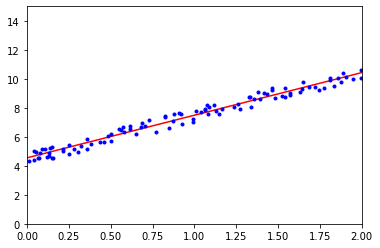

In [3]:
# theta_best로 예측한 결과 그래프 출력
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# scikit learn 선형회귀 (LinearRegression)으로 구현
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

print(lin_reg.predict(X_new))

[4.54999779] [[2.94065581]]
[[ 4.54999779]
 [10.43130941]]


**4.2 경사하강법**

In [5]:
# 4.2.1 배치 경사 하강법
# 매 스텝에서 비용함수의 편도함수를 구한다.
# 매 스텝에서 전체 훈련 세트에 대한 편도함수를 구하기 때문에 시간이 오래걸린다.
eta = 0.1 # 학습률, learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y) # 비용 함수의 편도함수
  theta = theta - eta * gradients # 경사하강법의 다음 스텝 계산 - 하이퍼 파라미터 계산

print(theta)

[[4.54999779]
 [2.94065581]]


In [6]:
# 4.2.2 확률적 경사 하강법
# 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 경사도 계산
# 배치 경사 하강법보다 빠르지만 확률적으로 샘플을 선택하기 때문에 불안정하다
n_epochs = 50 # 반복횟수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
  # m: 샘플의 수
  for i in range(m):
    # 무작위로 샘플 선별
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]

    # 경사도 계산
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

    # learning_schdule, 학습 스케줄 함수를 통해서 학습률을 계산
    # 학습률을 점진적으로 감소시켜서 전역최솟값에 도달할 수 있도록 한다.
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

print(theta)

[[4.53754614]
 [2.94331036]]


In [7]:
# scikit-learn SGD 예시
from sklearn.linear_model import SGDRegressor

# epoch 50 제한
# eta 0.1
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.54447681] [2.96043929]


**4.3 다항회귀**
- 비선형 데이터를 선형 모델을 사용하여 학습
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킨다.
  - 훈련세트의 데이터들을 각 특성을 제곱한 값이 추가되도록 변환한다.

In [8]:
# 이차방정식을 사용한 다항회귀 예제
# 이차방정식으로 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # y = 0.5X^2 + X + 2 + 노이즈

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# 2차방정식이기 때문에 X의 값을 제곱하여 새로운 특성으로 추가시켜주는 방식으로 데이터 셋 변형한다.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# X_poly의 데이터 셋에 기존 데이터의 제곱값이 특성으로 추가되어있다.
print(X[0])
print(X_poly[0])

[-1.76912545]
[-1.76912545  3.12980485]


In [10]:
# 선형회귀로 학습
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# y = 0.5X^2 + X + 2 + 노이즈
print(lin_reg.intercept_, lin_reg.coef_)

[1.65919612] [[0.92327858 0.55249773]]


**4.4 학습 곡선**
- 모델의 학습 곡선을 확인하여서 과대 적합, 과소 적합 분석 등을 진행한다.

In [11]:
# 모델의 학습곡선 예시
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습곡선을 그리는 함수
def plot_learning_curves(model, X, y):
  # 훈련 데이터 셋 분리
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    # 매 스텝에서 크기가 다른 서브셋으로 훈련 후 예측
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    # mse 계산
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  
  # mse -> rmse로 값 변환 후 그래프 출력
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val set")

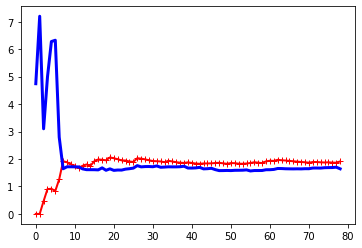

In [35]:
# 선형회귀 모델에 대한 학습곡선 출력
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 그래프 분석
  1. 데이터가 많아질수록 그래프의 변동이 줄어들고 편평해진다.
  2. 오차율이 높은 값에서 수렴한다. - 과소적합 문제를 의심해볼 수 있다.

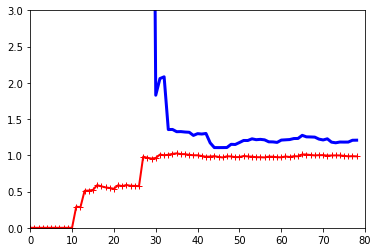

In [34]:
# polynomial features degree=10으로 10차 다항 회귀 모델의 학습 곡선을 출력
from sklearn.pipeline import Pipeline

# 다항회귀 훈련을 위한 pipeline
# PolynomialFeatures 함수를 통해서 다항 특성의 제곱을 특성으로 추가
# LinearRegression을 통해서 선형회귀모델 학습
polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])

# 그래프 그림
plot_learning_curves(polynomial_regression, X, y)

# 그래프 출력 제한
plt.axis([0, 80, 0, 3])
plt.show()

- 그래프 분석
  
  1. 훈련 데이터의 오차가 선형 회귀모델보다 훨씬 낮고 두 곡선 사이에 간격이 이전보다 넓다.
    
    -> 과대적합 문제 의심

**4.5 규제가 있는 선형모델**
- 훈련세트에 대한 과대적합을 방지하기 위한 규제
- 릿지회귀
- 라쏘회귀
- 엘라스틱넷

In [36]:
# 릿지회귀
# 규제가 추가된 선형회귀
# 학습 알고리즘을 데이터에 맞추는 역할을 한다.
# 모델의 가중치가 가능한 작게 유지되도록 한다.
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[[5.02142392]]


In [37]:
# 확률적 경사 하강법 사용
sgd_reg = SGDRegressor(max_iter=1000, penalty="l2") # l2는 SGD 비용 함수에 가중치 벡터의 l₂ 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. - 릿지회귀
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[4.9980072]


In [38]:
# 라쏘회귀
# 자동으로 특성 선택을 하여 희소 모델을 만든다. (덜 중요한 특성의 가중치를 제거하려한다.)
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

[4.9839649]


In [39]:
# 확률적 경사 하강법 사용
# SGDRessressor(penaly="l1")
sgd_reg = SGDRegressor(max_iter=1000, penalty="l1")
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[5.00163305]


In [40]:
# 엘라스틱넷
# 릿지 + 라쏘
# 혼합비율 r을 사용해 두 방법을 조절한다.
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.98450149])

In [ ]:
# 4.5.4 조기 종료
# 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 방법
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1) # y = 0.5x^2 + x + 2 + noise

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# 데이터 스케일 조정 파이프라인 설정
# PolynomialFeatures 함수로 다항 특성의 제곱근을 특성으로 추가
# StandardScaler를 사용하여 입력값 scale 표준화
poly_scaler = Pipeline([
                        ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])

# 데이터 특성 및 스케일 조정
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# 경사하강법 사용 - max_iter 1로 설정해서 한스텝씩 학습하도록 설정
# warm_start=True로 설정하면 fit() 실행시에 학습을 처음부터 시작하지 않고 현재 모델의 파라미터에 이어서 학습한다. 
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)


# 검증 오류가 최솟값이 되는 epoch와 그때의 model을 찾도록 한다.
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  # 매 step마다 mse 오차 계산해서 최소 오차율보다 더 작으면 해당 스텝의 모델을 최솟값으로 저장한다.
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [60]:
best_epoch, best_model

(243,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

**4.6 로지스틱 회귀**
- 샘플이 특정 클래스에 속할 확률을 추정하는데 사용한다.
- 로지스틱: 0과 1사이의 값을 출력하는 시그모이드 함수

In [62]:
# 4.6.3 결정 경계
from sklearn import datasets

# iris dataset load
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)  # 1: Iris-virginica, 0: 그외

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [63]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

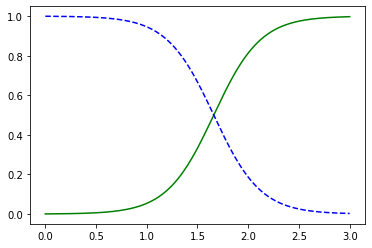

In [64]:
# 꽃잎의 너비가 0~3cm인 꽃에 대한 모델의 추정 확률 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Non Iris-Virginica")

plt.show()

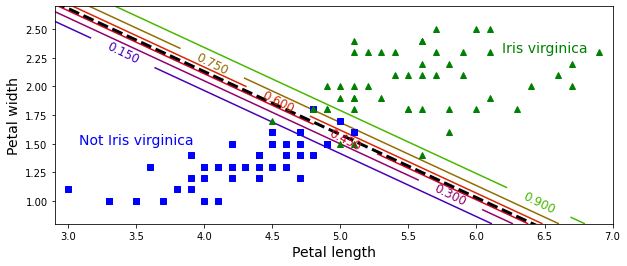

In [65]:
# 선형 결정 경계 그래프 출력
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [66]:
# 4.6.4 소프트맥스 회귀
# 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화한다.
# 샘플 x에 대해서 소프트맥스 회귀 모델이 각 클래스에 대한 점수를 계산하고 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다.
# 훈련시에는 크로스 엔트포리 비용함수를 최소화하는 방향으로 학습한다.
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
